#Moons dataset

Shapes- (1000, 2) (1000,)


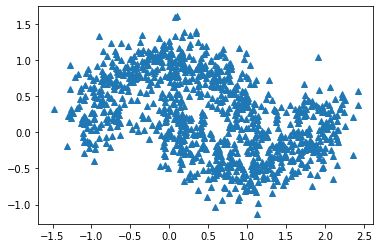

In [ ]:
from sklearn.datasets import make_moons
X ,y = make_moons(n_samples=1000,noise=0.22)
print(f"Shapes-",X.shape ,y.shape)
import matplotlib.pyplot as plt

plt.plot(X[:,0],X[:,1],'^')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 69)
print(X_train.shape)
print(X_test.shape)

(800, 2)
(200, 2)


#Voting Classifier

LogisticRegression 0.845


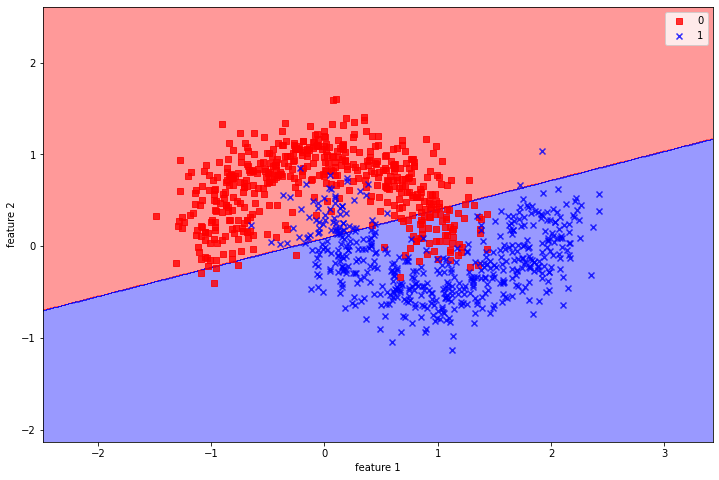

SVC 0.94


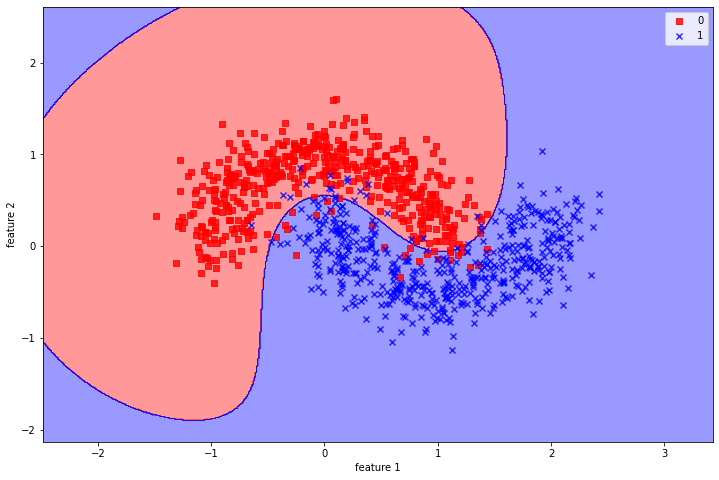

RandomForestClassifier 0.95


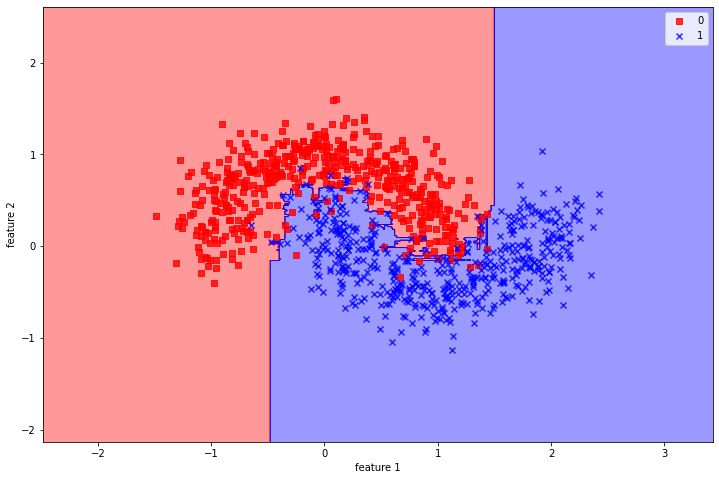

VotingClassifier 0.93


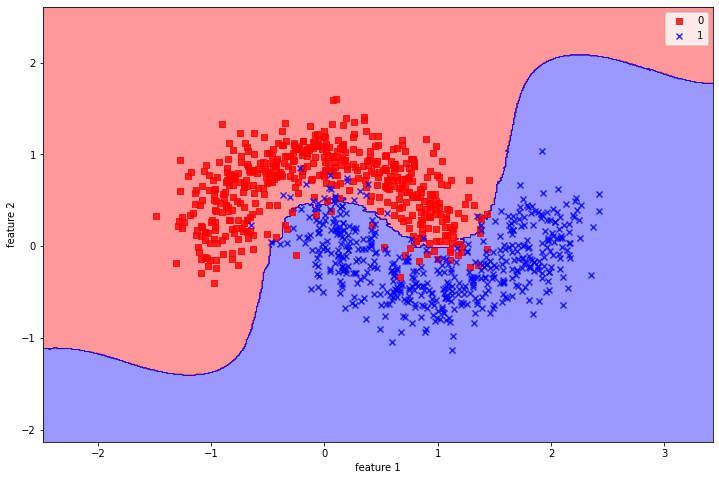

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression()
svm_clf = SVC(probability=True)
rf_clf = RandomForestClassifier()
vot_clf = VotingClassifier(voting="soft",estimators=[('log',log_clf),('svm',svm_clf),('rf',rf_clf)])

for clf in (log_clf,svm_clf,rf_clf,vot_clf):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__,accuracy_score(y_test,y_pred))
  plot_decision_surface(X,y,clf)
  plt.show()
plt.show()
  


#Bagging And Pasting

0.935


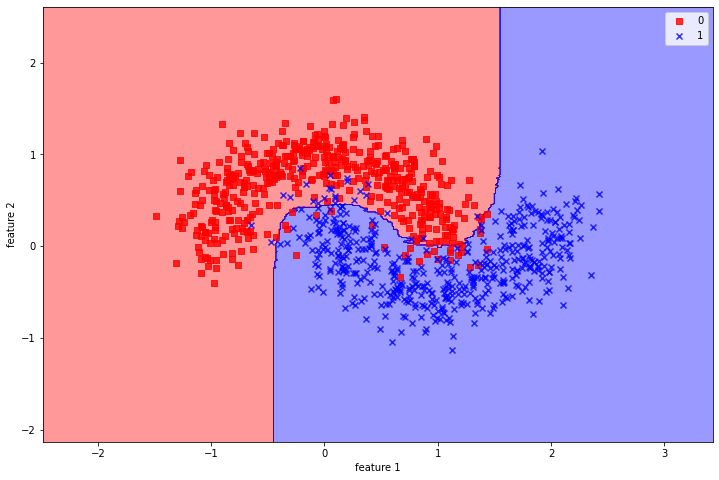

0.93


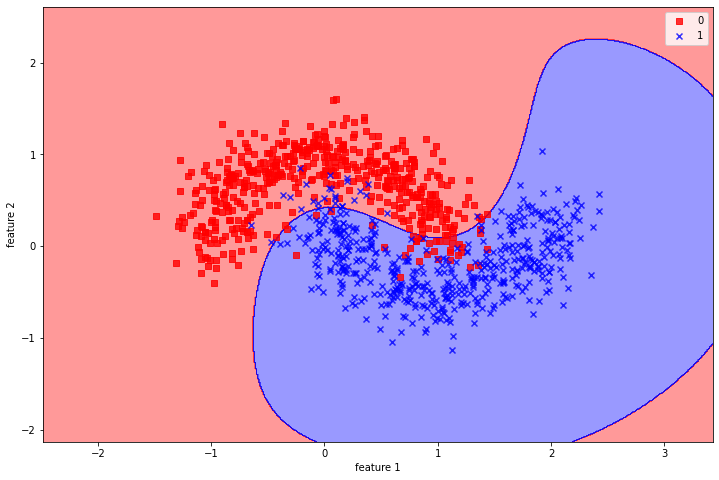

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#bagging - with replacements (bootstrap = True)
#pasting - without replacements (bootstrap = False)


#using Decision tree
bg_clf = BaggingClassifier(
    DecisionTreeClassifier(),n_estimators = 500,
    max_samples =100, bootstrap = True, n_jobs = -1,oob_score = True
)
bg_clf.fit(X_train,y_train)
y_pred = bg_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

print("Bagging")
#just for plot(ignore )
plot_decision_surface(X,y,bg_clf)
plt.show()


#using SVC
bg_clf2 = BaggingClassifier(
    SVC(probability=True),n_estimators = 100,
    max_samples =100, bootstrap = False, n_jobs = -1
)
bg_clf2.fit(X_train,y_train)
y_pred = bg_clf2.predict(X_test)
print(accuracy_score(y_test,y_pred))

print("PAsting")
#just for plotting (ignore plij)
plot_decision_surface(X,y,bg_clf2)
plt.show()

#Random Forest

0.93


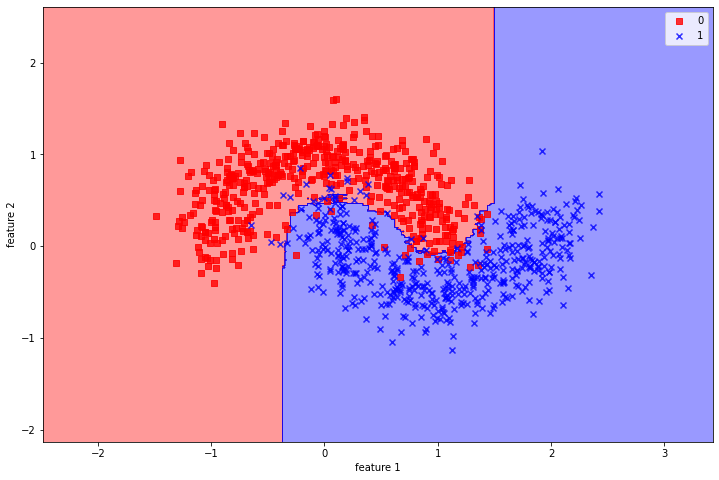

0.935


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=15,n_jobs = -1)
rnd_clf.fit(X_train,y_train)
y_pred = rnd_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))


#just for plotting (ignore plij)
plot_decision_surface(X,y,rnd_clf)
plt.show()

#above code is very similar to this version of bagging with max_sample = 1.0
#means full dataset will go through each classifier/estimator
bg_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random",max_leaf_nodes=16),n_estimators = 500,
    max_samples =1.0, bootstrap = True, n_jobs = -1
)
bg_clf.fit(X_train,y_train)
y_pred = bg_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))



#Extra Trees

In [ ]:
#not much imp
from sklearn.ensemble import ExtraTreesClassifier

#using random threshold values for each feature rather than searching the best possible thresholds
et_clf = ExtraTreesClassifier(n_estimators=500,max_leaf_nodes=15,n_jobs = -1)
et_clf.fit(X_train,y_train)
y_pred = et_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.93


#AdaBoosting 

0.935


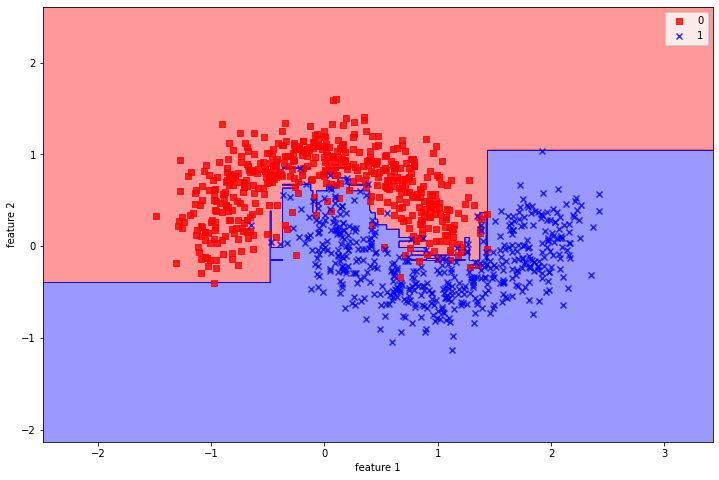

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adb_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),n_estimators = 500,
    algorithm = "SAMME.R",learning_rate = 0.5
)
adb_clf.fit(X_train,y_train)
y_pred = adb_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

#just for plotting (ignore plij)
plot_decision_surface(X,y,adb_clf)
plt.show()

#Gradient Boosting

0.935


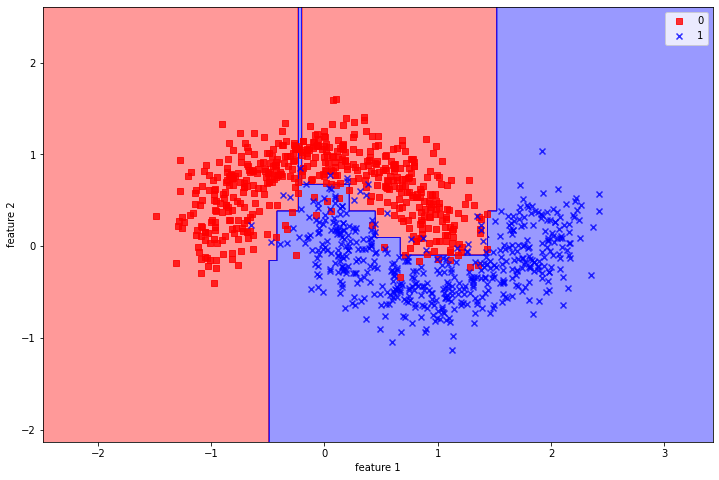

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth =2,n_estimators =9, learning_rate = 1.0)
gb_clf.fit(X_train,y_train)
y_pred = gb_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

#just for plotting (ignore plij)
plot_decision_surface(X,y,gb_clf)
plt.show()

#Code for plotting (i dont know what the fcuk it is, but output is satisfying AF)

In [ ]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker, cm
from mpl_toolkits import mplot3d

from matplotlib.colors import ListedColormap
def plot_decision_surface(X, y, predictor, ax_delta=1.0, mesh_res = 0.01, alpha=0.4, bscatter=1,  
                          figs_x1=12.0, figs_x2=8.0, x1_lbl='x1', x2_lbl='x2', 
                          legend_loc='upper right'):

    # some arrays and colormap
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot size  
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = figs_x1 
    fig_size[1] = figs_x2
    plt.rcParams["figure.figsize"] = fig_size

    # mesh points 
    resolution = mesh_res
    x1_min, x1_max = X[:, 0].min()  - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min()  - 1, X[:, 1].max() + 1
    xm1, xm2 = np.meshgrid( np.arange(x1_min, x1_max, resolution), 
                            np.arange(x2_min, x2_max, resolution))
    mesh_points = np.array([xm1.ravel(), xm2.ravel()]).T

    # predicted vals 
    Z = predictor.predict(mesh_points)
    Z = Z.reshape(xm1.shape)

    # plot contur areas 
    plt.contourf(xm1, xm2, Z, alpha=alpha, cmap=cmap)

    # add a scatter plot of the data points 
    if (bscatter == 1): 
        alpha2 = alpha + 0.4 
        if (alpha2 > 1.0 ):
            alpha2 = 1.0
        for idx, yv in enumerate(np.unique(y)): 
            plt.scatter(x=X[y==yv, 0], y=X[y==yv, 1], 
                        alpha=alpha2, c=[cmap(idx)], marker=markers[idx], label=yv)
            
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    if (bscatter == 1):
        plt.legend(loc=legend_loc)

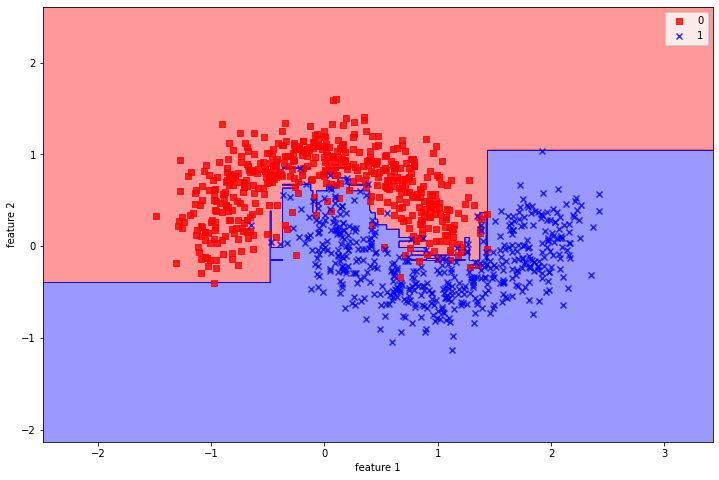

In [ ]:
plot_decision_surface(X,y,adb_clf)